# Introduction


**What?** Super()



# What is super()?


- While Python isn’t purely an object-oriented language, it’s flexible enough and powerful enough to allow you to build your applications using the object-oriented paradigm. 
- One of the ways in which Python achieves this is by supporting inheritance, which it does with `super()`. 



# Base class


- We are going to create a base class.
- Its methods will be inherited by a derived class.



In [14]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

# Derived class withouth super()

In [15]:
class Square:
    def __init__(self, length):
        self.length = length

    def area(self):
        return self.length * self.length

    def perimeter(self):
        return 4 * self.length


# Derived class with super()


- We are jsut adding a `_m` to distinguish the classes from the previous case.
- The `_m_v2` is to account for the Python 3, the `super(Square, self)` call is EQUIVALENT to the parameterless `super()` call. The first parameter refers to the subclass Square, while the second parameter refers to a Square object which, in this case, is self



In [16]:
# Here we declare that the Square class inherits from the Rectangle class
class Square_m(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)

In [17]:
# Here we declare that the Square class inherits from the Rectangle class
class Square_m_v2(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)

# Comparison

In [18]:
rectangle = Rectangle(2,4)
print("Rectangle area", rectangle.area())

Rectangle area 8



- Nothing special in this call, but the code, however, doesn’t reflect that relationship and thus has code that is essentially **repeated**. 
- What if we can reuse the code written in the `Rectangle` class in the `Square` class. 



In [19]:
square = Square(4)
print("Square area (withouth super)", square.area())

Square area (withouth super) 16



- Here, you’ve used `super()` to call the `__init__()` of the Rectangle class, allowing you to use it in the Square class without repeating code. 
- The Square class inherited the `.area()` method from the Rectangle class.



In [20]:
square_m = Square_m(4)
print("Square area (with super)", square_m.area())

Square area (with super) 16


In [21]:
square_m = Square_m_v2(4)
print("Square area (with super but how we used to do in python 2.x)", square_m.area())

Square area (with super but how we used to do in python 2.x) 16


# Multiple Inheritance Overview 


- In addition to single inheritance, Python supports multiple inheritance, in which a subclass can inherit from multiple superclasses that don’t necessarily inherit from each other (also known as sibling classes). 



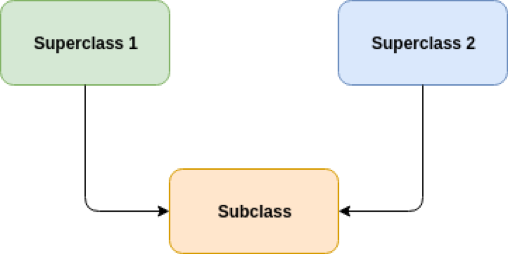

In [22]:
class Triangle_SC1:
    """
    Superclass No1
    """
    def __init__(self, base, height):
        self.base = base
        self.height = height

    def area(self):
        print("Using area from square_C1")
        return 0.5 * self.base * self.height

In [23]:
class Square_SC2:
    """
    Superclass No2
    """
    def __init__(self, length):
        self.length = length

    def area(self):
        print("Using area from square_C2")        
        return self.length * self.length

    def perimeter(self):
        return 4 * self.length


- The problem, though, is that both superclasses (Triangle and Square) define a .area(). 
- The **method resolution order (or MRO)** tells Python how to search for inherited methods. 
- This comes in handy when you’re using super() because the MRO tells you exactly where Python will look for a method you’re calling with super() and in what order.
 


In [24]:
class RightPyramid(Square_SC2, Triangle_SC1):
    """
    The signature of the class is important.
    Writing (Square, Triangle) is not the same as (Triangle, Square)
    """
    def __init__(self, base, slant_height):
        self.base = base
        self.slant_height = slant_height
        super().__init__(self.base)

    def area(self):
        base_area = super().area()
        perimeter = super().perimeter()
        return 0.5 * perimeter * self.slant_height + base_area

In [25]:
RightPyramid.__mro__

(__main__.RightPyramid, __main__.Square_SC2, __main__.Triangle_SC1, object)

In [26]:
pyramid = RightPyramid(2, 4)
pyramid.area()

Using area from square_C2


20.0

# References


- https://realpython.com/python-super/ 

